# Лабораторна робота №3 з Видобування даних
## Очищення даних
### Мета роботи: навчитися базовому фунукціоналу pandas для обробки та підготовки даних до моделювання та використання

###1. Завантажте набір даних у колаб, і у data frame

In [35]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/players_fifa23.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,preferred_foot,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,L. Messi,RW,91,91,54000000.0,195000.0,35,169,67,Left,...,96.0,20,35,24,6,11,15,14,8,NaN
1,K. Benzema,"CF, ST",91,91,64000000.0,450000.0,34,185,81,Right,...,90.0,43,24,18,13,11,5,5,7,NaN
2,R. Lewandowski,ST,91,91,84000000.0,420000.0,33,185,81,Right,...,88.0,35,42,19,15,6,12,8,10,NaN
3,K. De Bruyne,"CM, CAM",91,91,107500000.0,350000.0,31,181,70,Right,...,89.0,68,65,53,15,13,5,10,13,NaN
4,K. Mbappé,"ST, LW",91,95,190500000.0,230000.0,23,182,73,Right,...,88.0,26,34,32,13,5,7,11,6,NaN


###2.Видаліть ті колонки які вам не потрібні для подальшого аналізу, залишивши ті що ви вибрали в рамках 2 лабораторної роботи ( df.drop )


In [36]:
selected_columns = [
    'short_name',
    'value_eur',
    'player_positions',
    'age',
    'height_cm',
    'weight_kg',
    'overall',
    'pace',
    'shooting',
    'passing',
    'dribbling',
    'defending',
    'physic'
]

df = df[selected_columns].copy()
df = df[~df['player_positions'].str.contains('GK', na=False)].copy()
df.head()

,short_name,value_eur,player_positions,age,height_cm,weight_kg,overall,pace,shooting,passing,dribbling,defending,physic
0,L. Messi,54000000.0,RW,35,169,67,91,81.0,89.0,90.0,94.0,34.0,64.0
1,K. Benzema,64000000.0,"CF, ST",34,185,81,91,80.0,88.0,83.0,87.0,39.0,78.0
2,R. Lewandowski,84000000.0,ST,33,185,81,91,75.0,91.0,79.0,86.0,44.0,83.0
3,K. De Bruyne,107500000.0,"CM, CAM",31,181,70,91,74.0,88.0,93.0,87.0,64.0,77.0
4,K. Mbappé,190500000.0,"ST, LW",23,182,73,91,97.0,89.0,80.0,92.0,36.0,76.0


###3.Скільки % записів у ваших колонках є пусті / null ? Вивдеіть для кожного стовпця відсоток таких записів (df.isnull) Якщо таких записів більше 50% - вартує видалити такий стовпець чи ні ? Якщо так - видаліть.


In [37]:
(df.isnull().sum() / len(df)) * 100

,0
short_name,0.000000
value_eur,0.431165
player_positions,0.000000
age,0.000000
height_cm,0.000000
weight_kg,0.000000
overall,0.000000
pace,0.000000
shooting,0.000000
passing,0.000000



###4.Перевірте свої записи на дублікати . Якщо такі є - це помилкові записи чи подібні але окремі ? (df.duplicated) Чи є у вас колонки з різними назвами але які містять одинакову інформацію ?


In [38]:
df.duplicated().sum()
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

###5.Чи є у вас помилки у назвах колонок - якщо так виправте перейменувавши їх



In [39]:
df.columns

Index(['short_name', 'value_eur', 'player_positions', 'age', 'height_cm',
       'weight_kg', 'overall', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic'],
      dtype='object')

###6.Перегляньти значення категорій якщо стовпці з такими даними є. Чи вони справді унікальні чи є помилкові дублікати ? ( приклади: model i Model , NA i NotAssesed, New-York i New York )




In [40]:
df['player_positions'] = df['player_positions'].str.split(',').str[0].str.strip()

positions = df['player_positions'].unique()

print(positions)
print(len(positions))

['RW' 'CF' 'ST' 'CM' 'CB' 'LW' 'CDM' 'LM' 'LB' 'CAM' 'RB' 'RM' 'RWB' 'LWB']
14


###7. В рамках 2 лабораторної чи у вас в даних є outliers? Якщо є - заберіть  той % або кількість яка у вашому випадку оптимальна


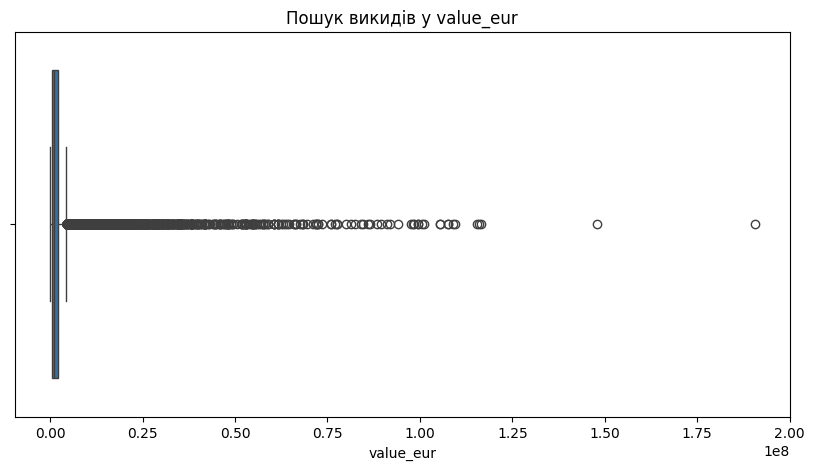

Аномалії до видалення:
     short_name  overall    value_eur
4    K. Mbappé       91  190500000.0
28  E. Haaland       88  148000000.0
До очищення: 16467 рядків, 13 стовпців
Після очищення: 16465 рядків, 13 стовпців
Видалено рядків: 2
Новий найдорожчий: F. de Jong | Overall: 87 | Value: 116500000.0


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

rows_before, cols_before = df.shape

plt.figure(figsize=(10,5))
sns.boxplot(x=df['value_eur'])
plt.title('Пошук викидів у value_eur')
plt.show()

top_2 = df.nlargest(2, 'value_eur')

print("Аномалії до видалення:\n",
      top_2[['short_name', 'overall', 'value_eur']])

df = df.drop(top_2.index)

rows_after, cols_after = df.shape

print("До очищення:", rows_before, "рядків,", cols_before, "стовпців")
print("Після очищення:", rows_after, "рядків,", cols_after, "стовпців")
print("Видалено рядків:", rows_before - rows_after)

new_top = df.loc[df['value_eur'].idxmax()]

print(f"Новий найдорожчий: {new_top['short_name']} | "
      f"Overall: {new_top['overall']} | "
      f"Value: {new_top['value_eur']}")

###8.Чи є у вас колонки з неправильним / пропущеними  значеннями? Якщо так , тоді опрацюйте їх в залежності від умови і типу даних

In [42]:
df.isnull().sum()
df = df.dropna()
df.isnull().sum()

# Зберігаємо
df.to_csv("/content/drive/MyDrive/Colab Notebooks/fifa_dataset_cleaned.csv", index=False)